


# Vamos encher o carrinho!

# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução


In [3]:
import pandas as pd

In [4]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products_df = pd.read_csv('/datasets/products.csv', sep=';')
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')

In [5]:
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [6]:
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [7]:
print(order_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


In [8]:
print(aisles_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [9]:
print(departments_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


# Etapa 2. Preparação de dados



## Plano de solução



### DataFrame `instacart_orders`

In [10]:
# Identificar linhas duplicadas
duplicated_rows = orders_df[orders_df.duplicated()]

# Exibir o número de linhas duplicadas
print("Número de linhas duplicadas:", len(duplicated_rows))

# Exibir as linhas duplicadas
print("\nLinhas duplicadas:")
print(duplicated_rows)

Número de linhas duplicadas: 15

Linhas duplicadas:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   



Há linhas duplicadas. O padrão de duplicidade aparece em Horário do Pedido e Dia da Semana.
As linhas duplicadas são iguais para order_hour_of_day, que é 2. Isso indica que todos esses pedidos foram feitos às 2h da manhã.
As linhas duplicadas são iguais para order_dow, que é 3. Isso significa que todos esses pedidos foram feitos na quarta-feira.

A remoção dessas duplicatas é importante para evitar distorções na análise.

In [21]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

# Filtro de pedidos feitos as 2h da qurta-feira.
wednesday_2am = orders_df[(orders_df['order_hour_of_day'] == 2) & (orders_df['order_dow'] == 3)]

# Contando os pedidos
print("Total de pedidos às 2h nas quartas:", len(wednesday_2am))

# Identificando todas as linhas com duplicatas 
duplicated_wednesday_2am = wednesday_2am[wednesday_2am.duplicated(keep=False)]

# Imprimindo as duplicatas 
print("\nDuplicatas neste horário:")
print(duplicated_wednesday_2am)

Total de pedidos às 2h nas quartas: 121

Duplicatas neste horário:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3       

O que esse resultado quer dizer?

Havia um número significativo de duplicatas para pedidos feitos às 2h nas quartas-feiras. Isso pode ser um bug no sistema de pedidos ou um comportamento repetitivo dos usuários.

In [18]:
orders_df_clean = orders_df.drop_duplicates()

In [19]:
print("\nNúmero de linhas antes da remoção:", len(orders_df))
print("Número de linhas após a remoção:", len(orders_df_clean))


Número de linhas antes da remoção: 478967
Número de linhas após a remoção: 478952


In [20]:
duplicate_order_ids = orders_df_clean['order_id'].duplicated().sum()
print("\nDuplicatas de order_id restantes:", duplicate_order_ids)


Duplicatas de order_id restantes: 0





Após a verificação de duplicatas foi constatado que existia um número significativo de valores repetidos, então a remoção reduziu as linhas removendo os valores duplicados e limpando os dados. Isso garante uma análise mais precisa e ajuda a evitar possíveis distorções.


### DataFrame `products`

In [22]:
# Verifique se há linhas completamente duplicadas

complete_duplicates = products_df[products_df.duplicated()]
print("Número de linhas completamente duplicadas:", len(complete_duplicates))

Número de linhas completamente duplicadas: 0


In [23]:
# Verifique apenas IDs dos produtos duplicados

duplicate_product_ids = products_df['product_id'].duplicated().sum()
print("\nNúmero de IDs de produtos duplicados:", duplicate_product_ids)


Número de IDs de produtos duplicados: 0


In [24]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

products_df['product_name_lower'] = products_df['product_name'].str.lower()
duplicate_product_names = products_df['product_name_lower'].duplicated().sum()
print("\nNúmero de nomes de produtos duplicados (em minúsculas):", duplicate_product_names)


Número de nomes de produtos duplicados (em minúsculas): 1361


In [25]:
# Verifique os nomes de produtos duplicados que não estão faltando

non_missing_names = products_df.dropna(subset=['product_name'])
duplicate_non_missing_names = non_missing_names['product_name_lower'].duplicated().sum()
print("\nNúmero de nomes de produtos duplicados que não estão faltando:", duplicate_non_missing_names)


Número de nomes de produtos duplicados que não estão faltando: 104




De acordo com o resultado da análise é possível identificar que existe falta de padronização nos dados, isso ode tornar os dados inconsistentes.
O resultado de 1.361 nomes de produtos duplicados, que diferem apenas em maiúsculas/minúsculas,mostra que será necessário padronizar os nomes dos produtos para garantir a consistência. Além disso, os 104 nomes de produtos duplicados que não estão faltando podem indicar produtos diferentes, nesse sentido, é necessário verificar para evitar distorções.


### DataFrame `departments`


In [26]:
# Verifique se há linhas completamente duplicadas

complete_duplicates = departments_df[departments_df.duplicated()]
print("Número de linhas completamente duplicadas:", len(complete_duplicates))

Número de linhas completamente duplicadas: 0


In [29]:
# Verifique apenas se há IDs dos produtos duplicados

duplicate_department_ids = departments_df['department_id'].duplicated().sum()
print("\nNúmero de IDs de departamentos duplicados:", duplicate_department_ids)


Número de IDs de departamentos duplicados: 0




Como não foram encontradas duplicatas, não é necessário realizar nenhuma correção nos dados.
Isso significa que cada linha é única e que cada department_id identifica exclusivamente um departamento.

### DataFrame `aisles`

In [30]:
# Verifique se há linhas completamente duplicadas

complete_duplicates = aisles_df[aisles_df.duplicated()]
print("Número de linhas completamente duplicadas:", len(complete_duplicates))

Número de linhas completamente duplicadas: 0


In [31]:
# Verifique apenas se há IDs dos produtos duplicados

duplicate_aisle_ids = aisles_df['aisle_id'].duplicated().sum()
print("\nNúmero de IDs de corredores duplicados:", duplicate_aisle_ids)


Número de IDs de corredores duplicados: 0




Como não foram encontradas duplicatas, não é necessário realizar nenhuma correção nos dados.
significa que cada linha é única e que cada aisle_id identifica exclusivamente um corredor

### DataFrame `order_products`

In [32]:
# Verifique se há linhas completamente duplicadas

complete_duplicates = order_products_df[order_products_df.duplicated()]
print("Número de linhas completamente duplicadas:", len(complete_duplicates))

Número de linhas completamente duplicadas: 0


In [33]:
# Verifique mais uma vez se há outros casos complicados de duplicados

duplicate_order_product_combinations = order_products_df.duplicated(subset=['order_id', 'product_id']).sum()
print("\nNúmero de combinações duplicadas de order_id e product_id:", duplicate_order_product_combinations)


Número de combinações duplicadas de order_id e product_id: 0




Com base no resultado, podemos concluir que não há linhas completamente duplicadas nem combinações duplicadas. 
Isso indica que cada registro de produto em um pedido é único, tanto nas colunas combinadas quanto na combinação específica de pedido e produto. Por este motivo não é necessário nenhuma correção.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas


### DataFrame `products`

In [34]:
# Encontre valores ausentes na coluna 'product_name'

missing_product_names = products_df['product_name'].isna().sum()
print("Número de nomes de produtos ausentes:", missing_product_names)

Número de nomes de produtos ausentes: 1258





Valores ausentes indica que há produtos sem nomes registrados, isso poderá impactar a análise de produtos.

In [36]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

missing_products = products_df[products_df['product_name'].isna()]
all_aisle_100 = (missing_products['aisle_id'] == 100).all()


print("\nTodos os nomes de produtos ausentes estão associados com o corredor de ID 100?", all_aisle_100)



Todos os nomes de produtos ausentes estão associados com o corredor de ID 100? True




 Isso sugere que o problema de valores ausentes pode estar relacionado a um erro de entrada de dados ou uma categoria de produtos não especificada.

In [37]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

missing_products = products_df[products_df['product_name'].isna()]

all_department_21 = (missing_products['department_id'] == 21).all()


print("Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?", all_department_21)

Todos os nomes de produtos ausentes estão associados com o departamento de ID 21? True




 Assim como descrito na conclusão acima, isso sugere que o problema de valores ausentes pode estar relacionado a um erro de entrada de dados ou uma categoria de produtos não especificada.

In [38]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

aisle_100_info = aisles_df[aisles_df['aisle_id'] == 100]
department_21_info = departments_df[departments_df['department_id'] == 21]

print("\nInformações do corredor com ID 100:")
print(aisle_100_info)

print("\nInformações do departamento com ID 21:")
print(department_21_info)


Informações do corredor com ID 100:
    aisle_id    aisle
99       100  missing

Informações do departamento com ID 21:
    department_id department
20             21    missing




Significa que os valores ausentes estão relacionados a categorias desconhecidas, o que pode ser um problema de dados incompletos.

In [41]:
# Preencha nomes de produtos ausentes com 'Unknown'

products_df['product_name'].fillna('Unknown', inplace=True)



Ao substituir os valores ausentes por 'Unknown', garantimos que a coluna product_name não contenha valores nulos, isso facilita análises e evita erros. Porém ainda é importante corrigir a categoria dos produtos para melhor qualidade dos dados.

### DataFrame `orders`

In [ ]:
# Encontre os valores ausentes

In [ ]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

### DataFrame `order_products`

In [42]:
# Encontre os valores ausentes

missing_add_to_cart_order = order_products_df['add_to_cart_order'].isna().sum()
print("Número de valores ausentes em 'add_to_cart_order':", missing_add_to_cart_order)

Número de valores ausentes em 'add_to_cart_order': 836


In [44]:
# Quais são os valores mínimo e máximo dessa coluna?

min_add_to_cart_order = order_products_df['add_to_cart_order'].min()
max_add_to_cart_order = order_products_df['add_to_cart_order'].max()

print("\nValor mínimo de 'add_to_cart_order':", min_add_to_cart_order)
print("Valor máximo de 'add_to_cart_order':", max_add_to_cart_order)


Valor mínimo de 'add_to_cart_order': 1.0
Valor máximo de 'add_to_cart_order': 64.0




Os valores ausentes podem indicar falhas no registro da sequência de adição dos produtos, impactando análises sobre comportamento de compra. Os valores variam de 1 a 64, sugerindo que alguns pedidos incluem muitos itensisso ajuda a entender o comportamento dos usuários. 

Isso mostra a importância de tratar os valores ausentes para garantir análises precisas.

In [46]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

# Filtro
orders_with_missing_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isna()]

# Valores ausentes
order_ids_with_missing = orders_with_missing_add_to_cart['order_id'].unique()

# Exibir os IDs
print("IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order':")
print(order_ids_with_missing_list)

IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order':
[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1564093, 129627, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2094761, 1038146, 2997021, 813364, 2256933, 171934, 2409109, 1730767, 1169835, 733526, 404157, 3125735, 747668, 1800005, 1961723, 871281, 388234, 1648217, 1477139, 102236, 1021563, 1832957, 2721963, 678116, 1220886, 1673227, 2999801, 1633337, 2470674, 2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650, 1598369, 1916118, 854647, 1302315, 888470, 180546, 2621907, 1308785, 2729254, 9310, 2170451, 2979697, 1625713, 1529171]


In [47]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem



# Filtrar
orders_with_missing_add_to_cart = order_products_df[order_products_df['add_to_cart_order'].isna()]

# Agrupar por ID
product_count_per_order = orders_with_missing_add_to_cart.groupby('order_id')['product_id'].count()

# Verificar mínimo
min_product_count = product_count_per_order.min()

# Exibir o valor mínimo
print("Valor mínimo da contagem de produtos em pedidos com valores ausentes:", min_product_count)

# Verificar se todos os pedidos com valores ausentes contêm mais de 64 produtos
all_orders_have_more_than_64_products = min_product_count > 64

print("\nTodos os pedidos com valores ausentes contêm mais de 64 produtos?", all_orders_have_more_than_64_products)

Valor mínimo da contagem de produtos em pedidos com valores ausentes: 1

Todos os pedidos com valores ausentes contêm mais de 64 produtos? False




Com base nessa análise podemos verificar que há vários pedidos com valores ausentes na coluna add_to_cart_order, isso pode impactar análises de comportamento de compra. 

Ao agrupar esses pedidos e contar o número de produtos, descobrimos que o valor mínimo é 1, mostrando que nem todos os pedidos com dados ausentes contêm mais de 64 produtos. 

Isso pode sugerir que a ausência de dados pode não estar relacionada ao tamanho do pedido, mas pode ser resultado de falhas no registro de dados. Portanto, é importante analisar mais a fundo as causas dos valores ausentes e considerar estratégias para análises futuras.

In [48]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

# Substituir por 999
order_products_df['add_to_cart_order'].fillna(999, inplace=True)

# Converter para o tipo inteiro
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)

# Verificar
print(order_products_df['add_to_cart_order'].head())

0    17
1     1
2     1
3    35
4     5
Name: add_to_cart_order, dtype: int64




Após substituir os valores ausentes por 999 e convertê-la para inteiros, a operação deu certo. 

Os primeiros valores confirmam que a conversão está correta e não há mais dados ausentes. 

Agora os daods estão prontos para análises futuras, e o uso de 999 facilita a identificação de registros que tinham dados ausentes.

## Conclusões


Na Etapa 2, realizei o pré-processamento dos dados para garantir consistência nas análises futuras.

-Removi duplicatas nos DataFrames.
-No products, substituí valores ausentes por "Unknown".
-No orders, identifiquei que valores ausentes podem indicar pedidos iniciais.
-No order_products, substituí valores ausentes por 999, convertendo-os para inteiros, o que facilita a identificação de registros com dados ausentes. Além disso, constatei que a ausência de dados pode não estar relacionada ao tamanho do pedido.

Esses tratamentos garantem que os dados estejam limpos, evitando distorções e garantindo a precisão das análises futuras.

# Etapa 3. Análise de dados



### [A1] Verifique se os valores fazem sentido

In [69]:
# Verificar os valores entre 0 e 23
valid_hours = orders_df['order_hour_of_day'].between(0, 23).all()

# Verificar os valores entre 0 e 6
valid_days = orders_df['order_dow'].between(0, 6).all()

# Exibir resultados
print("Os valores em 'order_hour_of_day' estão dentro do intervalo esperado (0-23)?", valid_hours)
print("Os valores em 'order_dow' estão dentro do intervalo esperado (0-6)?", valid_days)

Os valores em 'order_hour_of_day' estão dentro do intervalo esperado (0-23)? True
Os valores em 'order_dow' estão dentro do intervalo esperado (0-6)? True




A verificação dos dados confirma que todos os valores nas colunas order_hour_of_day e order_dow estão dentro dos intervalos esperados. 

Isso indica que os dados representam corretamente as horas do dia e os dias da semana, garantindo a integridade DASinformações para análises.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

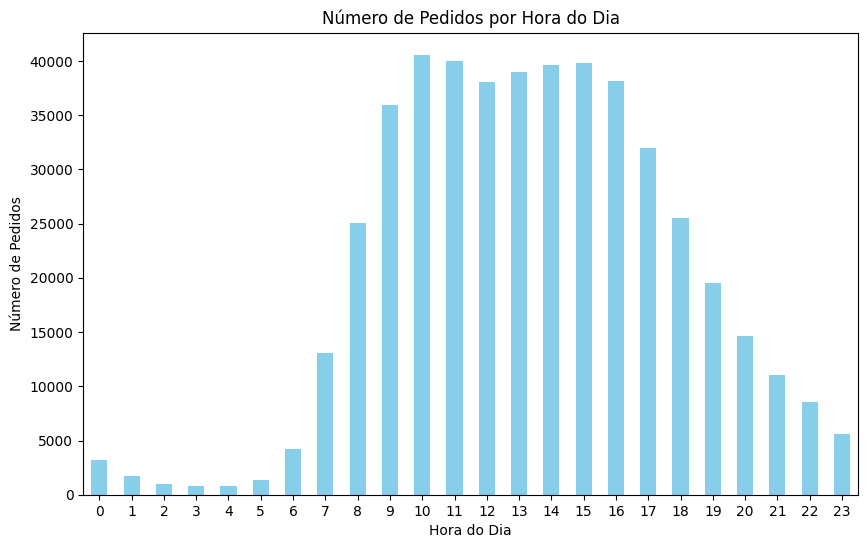

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [66]:
from matplotlib import pyplot as plt

# Gráfico de pedidos a cada hora do dia
orders_df['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Número de Pedidos por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.show()


orders_per_hour = orders_df['order_hour_of_day'].value_counts().sort_index()


print(orders_per_hour)



É possível observar que o número de pedidos aumenta significativamente a partir das 7h, atingindo o pico entre 9h e 15h, com o maior volume de pedidos às 10h. Após as 17h, o número de pedidos começa a diminuir gradualmente.

Os horários de menor atividade são entre 0h e 5h. Esses padrões sugerem que os consumidores preferem fazer compras durante o dia, especialmente no final da manhã e início da tarde.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

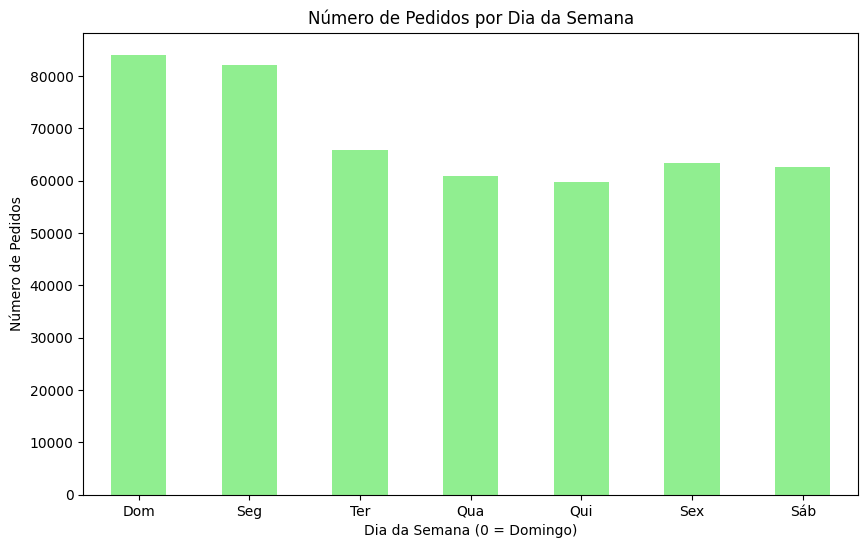

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


In [67]:
from matplotlib import pyplot as plt


# Gráfico de que dia da semana as pessoas fazem compras.
orders_df['order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Número de Pedidos por Dia da Semana')
plt.xlabel('Dia da Semana (0 = Domingo)')
plt.ylabel('Número de Pedidos')
plt.xticks(ticks=range(0, 7), labels=['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'], rotation=0)
plt.show()

orders_per_day = orders_df['order_dow'].value_counts().sort_index()
print(orders_per_day)



É possível observar que o maior número de pedidos ocorre no domingo (0), seguido de perto pela segunda-feira (1). 

Isso pode sugerir que os usuários preferem fazer suas compras de produtos alimentícios no início da semana, possivelmente para se preparar para os dias seguintes. 

O volume de pedidos diminui de terça-feira (2) a quinta-feira (4), ou seja, com menor atividade de compras no meio da semana. No entanto, há um leve aumento na sexta-feira (5) e sábado (6), o que pode significar compras para o fim de semana. 

Esses padrões apontam que é ideal ter estratégias de vendas no início e final da semana para o engajamento dos usuários.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?



A análise mostra que o tempo mínimo entre pedidos é de 0 dias, o que pode indicar compras consecutivas no mesmo dia, enquanto o máximo é de 30 dias, sugerindo um ciclo mensal para alguns consumidores ou até mesmo compras recorrentes por assinatura. 

Isso reflete uma variedade de padrões de compra.

Valor mínimo de dias até o próximo pedido: 0.0
Valor máximo de dias até o próximo pedido: 30.0


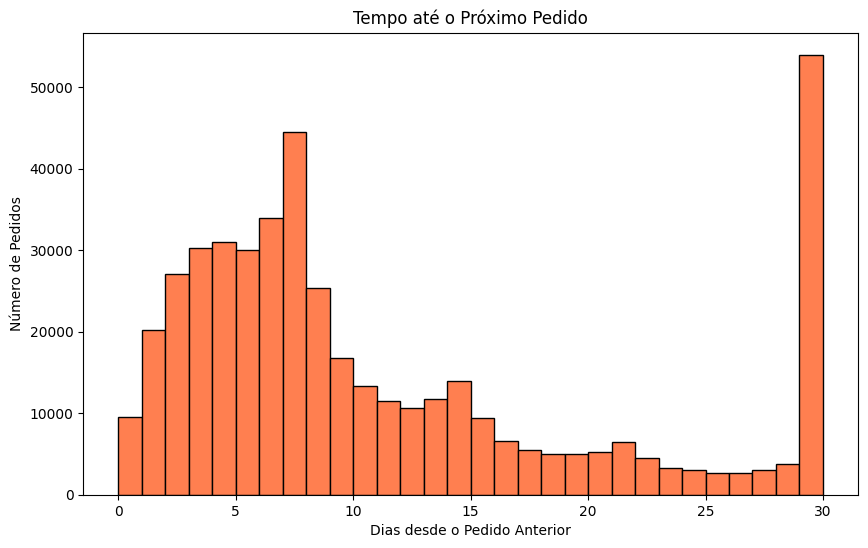

In [68]:
from matplotlib import pyplot as plt


# Gráfico de quanto tempo as pessoas esperam até fazer seu próximo pedido
orders_df['days_since_prior_order'].dropna().plot(kind='hist', bins=30, figsize=(10, 6), color='coral', edgecolor='black')
plt.title('Tempo até o Próximo Pedido')
plt.xlabel('Dias desde o Pedido Anterior')
plt.ylabel('Número de Pedidos')

# Comentário sobre os valores mínimo e máximo
min_days = orders_df['days_since_prior_order'].min()
max_days = orders_df['days_since_prior_order'].max()
print(f"Valor mínimo de dias até o próximo pedido: {min_days}")
print(f"Valor máximo de dias até o próximo pedido: {max_days}")

plt.show()

### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [54]:
import pandas as pd
from matplotlib import pyplot as plt

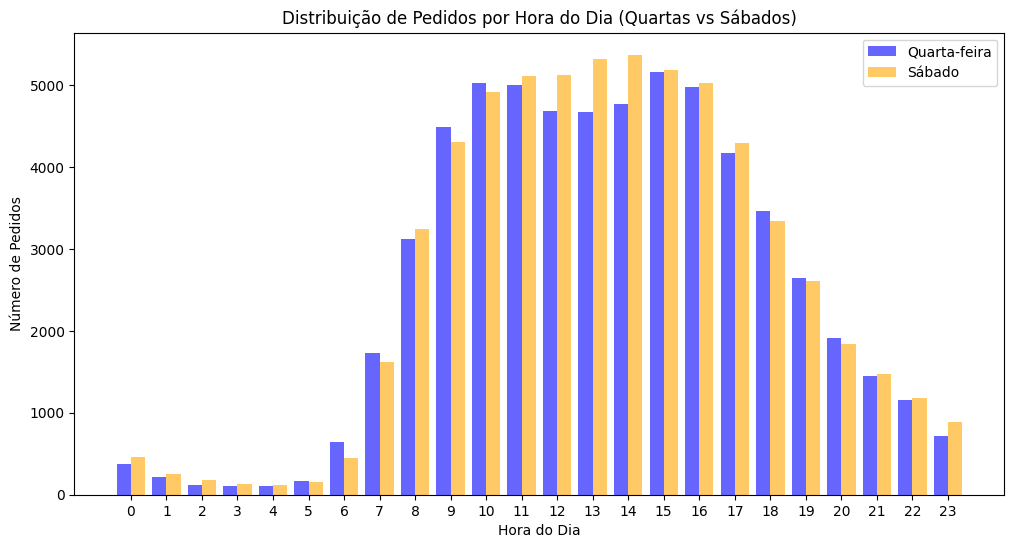

In [58]:
# Filtro para quartas (3) e sábados (6)
wednesday_orders = orders_df[orders_df['order_dow'] == 3]
saturday_orders = orders_df[orders_df['order_dow'] == 6]

# Contar pedidos por hora
wednesday_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label='Quarta-feira', color='blue', alpha=0.6)
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label='Sábado', color='orange', alpha=0.6)
plt.title('Distribuição de Pedidos por Hora do Dia (Quartas vs Sábados)')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Pedidos')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

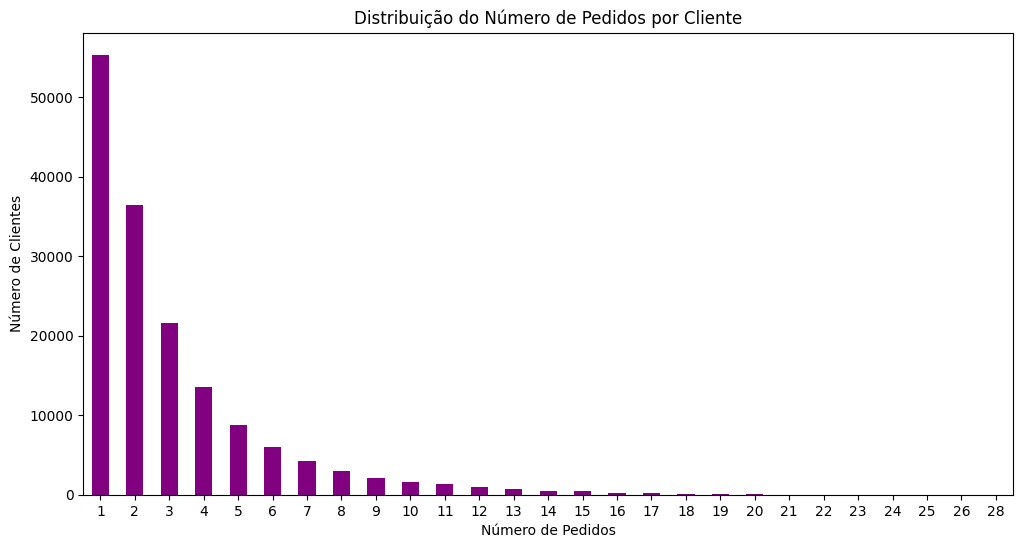

In [61]:
# Contar o número de pedidos por cliente
orders_per_customer = orders_df['user_id'].value_counts()

# Contar quantos clientes fizeram 1, 2, 3, etc. pedidos
order_distribution = orders_per_customer.value_counts().sort_index()

# Criar gráfico de barras para a distribuição
plt.figure(figsize=(12, 6))
order_distribution.plot(kind='bar', color='purple')
plt.title('Distribuição do Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.show()



O gráfico mostra que a maioria dos clientes faz apenas um pedido, com um número decrescente de clientes à medida que o número de pedidos aumenta. 

Isso indica que muitos clientes são compradores ocasionais, enquanto um grupo menor realiza compras repetidas. 

Essa distribuição sugere que pode ser adotadas estratégias de fidelização, assim podendo aumentar o número de pedidos por cliente.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [62]:
# Contar a frequência dos produtos
product_counts = order_products_df['product_id'].value_counts().head(20)

# Quais os nomes
top_products = products_df[products_df['product_id'].isin(product_counts.index)]

# Quais os IDs
top_products_info = top_products[['product_id', 'product_name']].set_index('product_id').loc[product_counts.index]

# Exibir os resultados
top_products_info['count'] = product_counts.values
print(top_products_info)

                   product_name  count
24852                    Banana  66050
13176    Bag of Organic Bananas  53297
21137      Organic Strawberries  37039
21903      Organic Baby Spinach  33971
47209      Organic Hass Avocado  29773
47766           Organic Avocado  24689
47626               Large Lemon  21495
16797              Strawberries  20018
26209                     Limes  19690
27845        Organic Whole Milk  19600
27966       Organic Raspberries  19197
22935      Organic Yellow Onion  15898
24964            Organic Garlic  15292
45007          Organic Zucchini  14584
39275       Organic Blueberries  13879
49683            Cucumber Kirby  13675
28204        Organic Fuji Apple  12544
5876              Organic Lemon  12232
8277   Apple Honeycrisp Organic  11993
40706    Organic Grape Tomatoes  11781




A análise dos 20 produtos mais populares mostra uma preferência por itens frescos e orgânicos, com bananas e sacos de bananas orgânicas liderando a lista. 

Produtos como morangos, espinafre, abacates e leite integral orgânico também são altamente demandados. 

Essa 'tendência' indica que os consumidores preferem alimentos naturais, dessa forma uma estratégia seria aumentar a variedade de produtos frescos disponíveis para essa demanda.

### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [63]:
import pandas as pd
from matplotlib import pyplot as plt

# Contar itens por pedido
items_per_order = order_products_df['order_id'].value_counts()

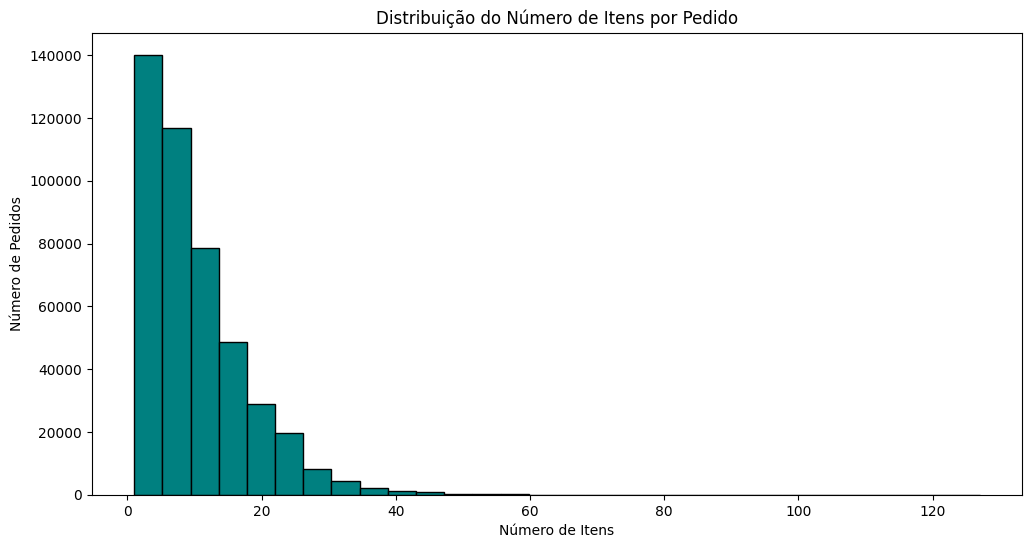

In [64]:
# Criar um histograma
plt.figure(figsize=(12, 6))
items_per_order.plot(kind='hist', bins=30, color='teal', edgecolor='black')
plt.title('Distribuição do Número de Itens por Pedido')
plt.xlabel('Número de Itens')
plt.ylabel('Número de Pedidos')
plt.show()

In [65]:
# Calcular a média 
average_items_per_order = items_per_order.mean()
print(f"Média de itens por pedido: {average_items_per_order:.2f}")

Média de itens por pedido: 10.10





A análise mostra que a maioria dos pedidos contém cerca de 10 itens, com uma distribuição que diminui à medida que o número de itens aumenta. 

Isso indica que os consumidores geralmente fazem compras de tamanho moderado, possivelmente para atender às necessidades semanais. 

A cauda longa na distribuição sugere que, embora menos comuns, alguns pedidos são significativamente maiores, o que pode refletir compras para ocasiões especiais. 

Esses resultados podem ajudar a otimizar o gerenciamento de estoque.

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [70]:
# Filtrar pedidos repetidos
reordered_products = order_products_df[order_products_df['reordered'] == 1]

# Contar a frequência de cada produto em pedidos repetidos
reordered_product_counts = reordered_products['product_id'].value_counts().head(20)

# Obter os nomes dos produtos
top_reordered_products = products_df[products_df['product_id'].isin(reordered_product_counts.index)]

# Juntar ID e nome
top_reordered_products_info = top_reordered_products[['product_id', 'product_name']].set_index('product_id').loc[reordered_product_counts.index]

# Adicionar a contagem de frequência
top_reordered_products_info['count'] = reordered_product_counts.values

# Exibir os resultados
print(top_reordered_products_info)

                   product_name  count
24852                    Banana  55763
13176    Bag of Organic Bananas  44450
21137      Organic Strawberries  28639
21903      Organic Baby Spinach  26233
47209      Organic Hass Avocado  23629
47766           Organic Avocado  18743
27845        Organic Whole Milk  16251
47626               Large Lemon  15044
27966       Organic Raspberries  14748
16797              Strawberries  13945
26209                     Limes  13327
22935      Organic Yellow Onion  11145
24964            Organic Garlic  10411
45007          Organic Zucchini  10076
49683            Cucumber Kirby   9538
28204        Organic Fuji Apple   8989
8277   Apple Honeycrisp Organic   8836
39275       Organic Blueberries   8799
5876              Organic Lemon   8412
49235       Organic Half & Half   8389




A análise dos 20 principais itens incluídos em pedidos repetidos aponta para a preferência por produtos frescos e orgânicos, com bananas e sacos de bananas orgânicas liderando a lista.

Isso indica que os consumidores têm alta fidelidade a produtos saudáveis e naturais, sugerindo que estratégias com foco em produtos orgânicos podem ser eficazes para aumentar a retenção de clientes e impulsionar compras repetidas.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [71]:
# Contar o total de pedidos para cada produto
total_orders_per_product = order_products_df['product_id'].value_counts()

# Contar os pedidos repetidos para cada produto
reordered_orders_per_product = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts()

# Calcular a parcela de pedidos repetidos
reorder_ratio = reordered_orders_per_product / total_orders_per_product

# Criar um DataFrame com os resultados
reorder_ratio_df = reorder_ratio.reset_index()
reorder_ratio_df.columns = ['product_id', 'reorder_ratio']

# Exibir os resultados
print(reorder_ratio_df.head(20))

    product_id  reorder_ratio
0            1       0.564286
1            2            NaN
2            3       0.738095
3            4       0.510204
4            7       0.500000
5            8       0.315789
6            9       0.761905
7           10       0.448071
8           11       0.625000
9           12       0.390244
10          13       0.500000
11          14            NaN
12          17            NaN
13          18       0.533333
14          19            NaN
15          21            NaN
16          22       0.500000
17          23       0.380952
18          24            NaN
19          25       0.674576




A análise da proporção de pedidos repetidos por produto revela que muitos produtos têm uma alta taxa de reordenação, indicando forte lealdade dos clientes. Produtos com uma taxa acima de 0.5, como os IDs 3, 9, e 25, são frequentemente reordenados, sugerindo que são favoritos entre os consumidores. No entanto, alguns produtos apresentam valores NaN, indicando que não foram reordenados, o que pode apontar para itens menos populares ou novos no mercado. Esses insights podem ajudar a direcionar estratégias de marketing e estoque, focando em produtos com alta fidelidade.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [73]:
# Filtro de produtos que são adicionados primeiro ao carrinho
first_in_cart = order_products_df[order_products_df['add_to_cart_order'] == 1]

# Contar a frequência de cada produto
first_in_cart_counts = first_in_cart['product_id'].value_counts().head(20)

# Obter os nomes dos produtos
top_first_in_cart_products = products_df[products_df['product_id'].isin(first_in_cart_counts.index)]

# Juntar ID e nome
top_first_in_cart_products_info = top_first_in_cart_products[['product_id', 'product_name']].set_index('product_id').loc[first_in_cart_counts.index]

# Adicionar a contagem de frequência
top_first_in_cart_products_info['count'] = first_in_cart_counts.values

# Exibir os resultados
print(top_first_in_cart_products_info)

                      product_name  count
24852                       Banana  15562
13176       Bag of Organic Bananas  11026
27845           Organic Whole Milk   4363
21137         Organic Strawberries   3946
47209         Organic Hass Avocado   3390
21903         Organic Baby Spinach   3336
47766              Organic Avocado   3044
19660                 Spring Water   2336
16797                 Strawberries   2308
27966          Organic Raspberries   2024
44632   Sparkling Water Grapefruit   1914
49235          Organic Half & Half   1797
47626                  Large Lemon   1737
196                           Soda   1733
38689     Organic Reduced Fat Milk   1397
26209                        Limes   1370
12341                Hass Avocados   1340
5785   Organic Reduced Fat 2% Milk   1310
27086                  Half & Half   1309
22935         Organic Yellow Onion   1246




A análise revela que produtos frescos e orgânicos, como bananas, leite integral orgânico e morangos, são frequentemente os primeiros itens colocados no carrinho. 

Isso pode indicar que os consumidores preferem produtos saudáveis e essenciais ao iniciar suas compras. A presença de itens como água e refrigerantes também sugere que bebidas são importantes. 

Tudo isso pode ajudar a otimizar as estratégias de marketing, destacando esses produtos para atrair a atenção dos consumidores logo no início de suas compras.

# Conclusão geral do projeto:

In [ ]:
A análise dos dados de pedidos revelou padrões no comportamento de compra dos consumidores:


Tamanho dos Pedidos: Os clientes tendem a fazer compras de tamanho moderado, com uma média de 10 itens por pedido;

Frequência de Compras: Muitos clientes são compradores ocasionais, enquanto um grupo menor realiza compras repetidas;

Preferências de Produtos: Produtos frescos e orgânicos, como bananas e espinafre, são populares, indicando uma preferência por alimentos saudáveis;

Horários de Compra: As compras ocorrem principalmente durante o dia, com picos entre 10h e 15h, e são mais frequentes no início da semana;


Esses resultados podem guiar estratégias de marketing, otimização de estoque, focando em produtos e horários de pico para maximizar o engajamento do cliente.